In [3]:
import matplotlib.pyplot as plt
import matplotlib
import json
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.pyplot import xticks
import sys
import pandas as pd
import seaborn as sns
import os 
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size


os.chdir("C:\\Users\\anr9744\\Projects\\Goo\\data")


In [8]:
with open(f"TEST2_doublet_simulation.json", 'r') as f:
    #print(f"Data locator: doublet_zoom_tension_adhesion.json")
    master_dict = json.load(f)
    
print(len(master_dict['Times'][0]))

99


In [6]:
with open(f"TEST2_doublet_simulation.json", 'r') as f:
    #print(f"Data locator: doublet_zoom_tension_adhesion.json")
    master_dict = json.load(f)
    
print(len(master_dict['Times'][0]))
frame = master_dict['Frames'][0]
dir = master_dict['Axis direction'].get('cell_A1')
length = master_dict['Axis length'].get('cell_A1')

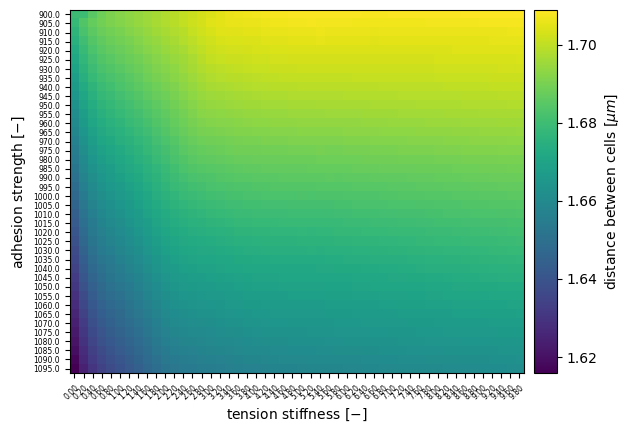

In [19]:
tension = master_dict['Tension']
adhesion = master_dict['Adhesion']
steady_distance = [dist[-1] for dist in master_dict['Distances']]

data_array = np.array(steady_distance).reshape(len(np.unique(adhesion)), len(np.unique(tension)))

# Create the heatmap using imshow()
fig, ax = plt.subplots()
im = ax.imshow(data_array)

# Set the tick labels for the x and y axes
ax.set_yticks(np.arange(len(np.unique(adhesion))))
ax.set_xticks(np.arange(len(np.unique(tension))))
ax.set_yticklabels(np.unique(np.abs(adhesion)), fontsize=5.5)
ax.set_xticklabels(np.unique(tension), fontsize=5.5)

# Format x-ticks
xtick_labels = [f'{val:0.2f}' for val in np.unique(tension)]
ax.set_xticklabels(xtick_labels, rotation=45)

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add labels and title to the plot
plt.ylabel(r'adhesion strength [$-$]')
plt.xlabel(r'tension stiffness [$-$]')

# Add a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = ax.figure.colorbar(im, cax=cax)
cbar.set_label(r'distance between cells [$\mu m$]')

fig.tight_layout()

# save image
plt.savefig(f"doublet_zoom_tension_adhesion_heatmap.png", dpi=500)

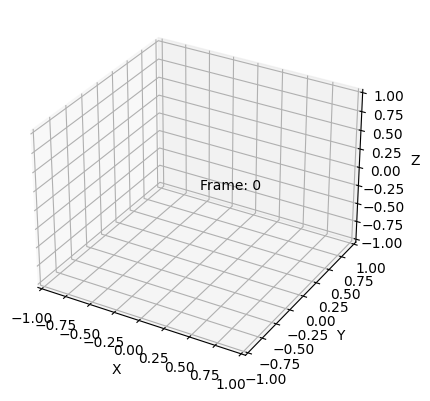

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Define the data
frame = master_dict['Frames'][0]
dir = master_dict['Axis direction'].get('cell_A2')
length = master_dict['Axis length'].get('cell_A2')

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Define a function to update the vector's position
def update_vec(frame):
    # Clear the previous plot
    ax.cla()
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # Get the current direction and length of the vector
    dir_curr = np.array(dir[frame])
    length_curr = length[frame]
    
    # Define the initial and final positions of the vector
    init_pos = np.array([0, 0, 0])
    end_pos = init_pos + dir_curr * length_curr
    
    # Plot the vector
    ax.quiver(init_pos[0], init_pos[1], init_pos[2], dir_curr[0], dir_curr[1], dir_curr[2], length=length_curr, arrow_length_ratio=0.1, color='r')
    ax.text(init_pos[0] + dir_curr[0] * length_curr, init_pos[1] + dir_curr[1] * length_curr, init_pos[2] + dir_curr[2] * length_curr, f'Frame: {frame}')
    
# Create the animation
anim = FuncAnimation(fig, update_vec, frames=range(len(frame)), interval=50)

# Save the animation as a gif
anim.save('vector_animation_cellA2.gif', writer='pillow')


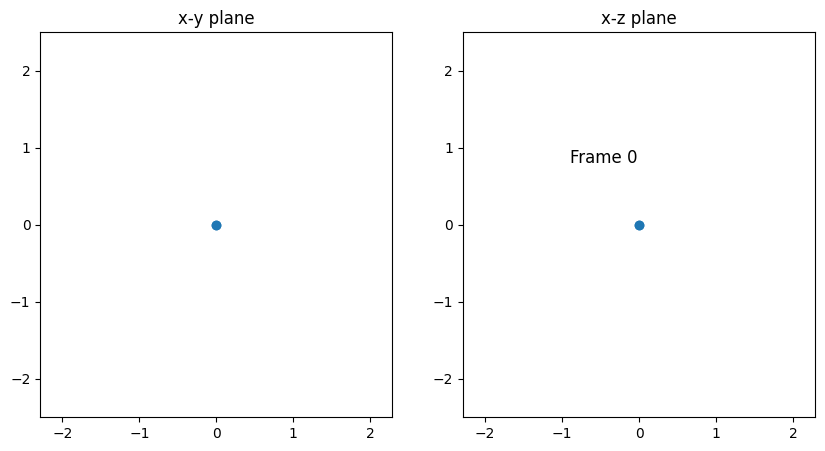

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define the frames, direction, and length data
# Define the data
frame = master_dict['Frames'][0]
dir = master_dict['Axis direction'].get('cell_A2')
length = master_dict['Axis length'].get('cell_A2')

# Define a function to update the vectors on each frame
def update_vec(frame):
    # Get the current direction and length
    dir_curr = np.array(dir[frame])
    length_curr = length[frame]

    # Calculate the start and end positions of the vector
    start_pos = [0, 0]
    end_pos = [length_curr * dir_curr[0], length_curr * dir_curr[1]]

    # Clear the previous plot
    plt.clf()

    # Plot the x-y plane vector
    plt.subplot(1, 2, 1)
    plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], '-o')
    plt.axis('equal')
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.title('x-y plane')

    # Plot the x-z plane vector
    plt.subplot(1, 2, 2)
    plt.plot([start_pos[0], dir_curr[0]], [start_pos[1], dir_curr[2]], '-o')
    plt.axis('equal')
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.title('x-z plane')
        
    # Add a frame counter
    plt.text(-0.9, 0.8, f"Frame {frame}", fontsize=12)


# Set up the figure and animation
fig = plt.figure(figsize=(10, 5))
ani = animation.FuncAnimation(fig, update_vec, frames=len(frame), interval=50, blit=False, repeat=False)

# Show the animation
ani.save('vector_animation_2D.gif', writer='pillow')
